In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

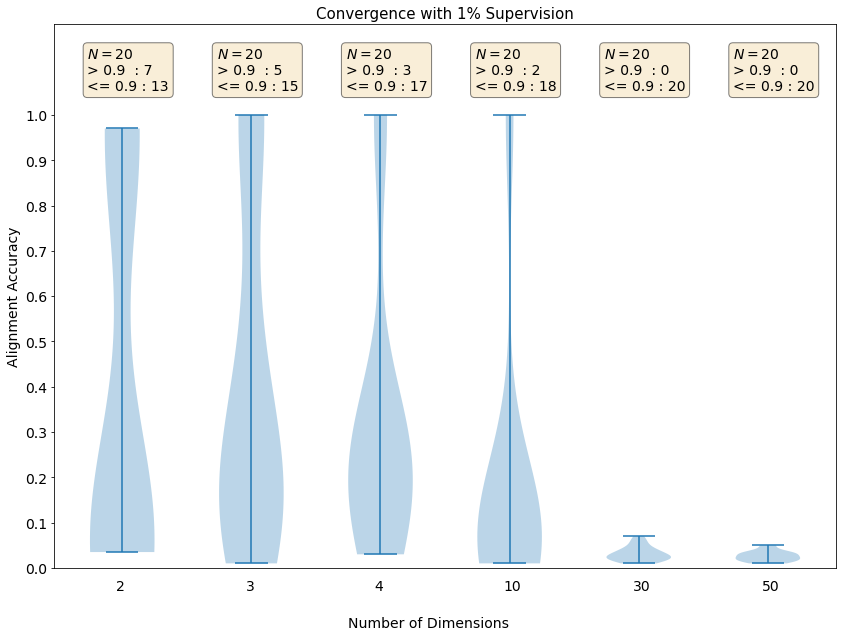

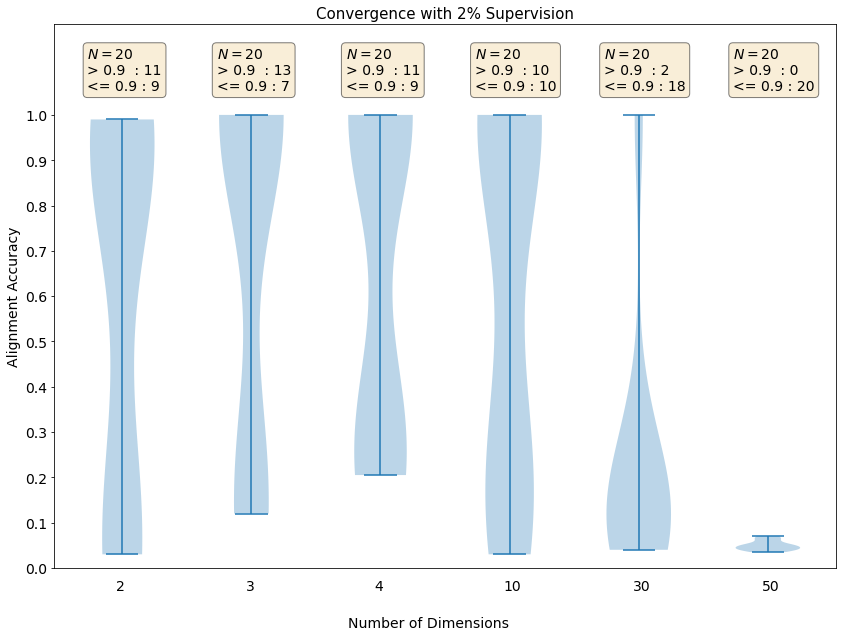

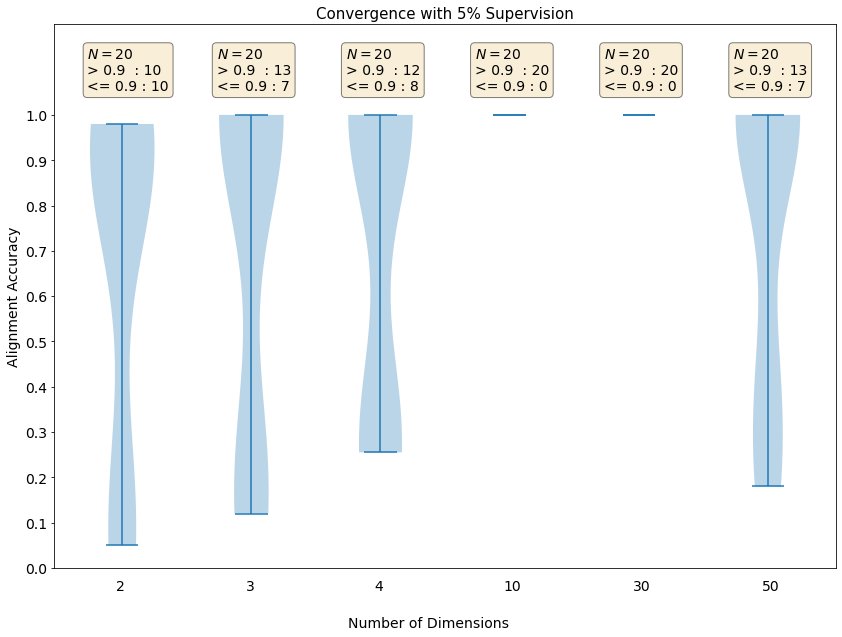

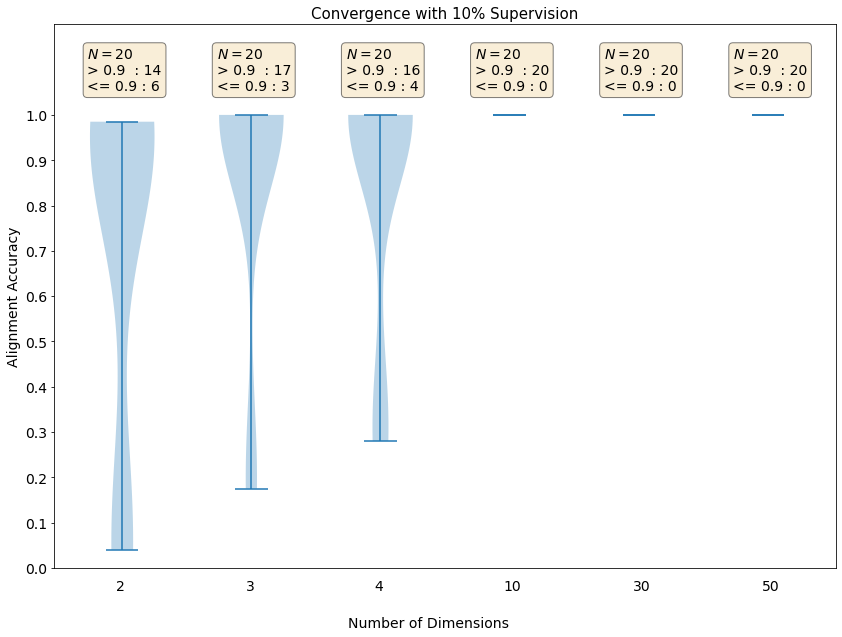

In [26]:
log_dir = '../semi-supervised/logs/supervised'

N = 20
n_dims = [2,3,4,10,30,50]
# n_dims = [2, 3, 4, 10, 30]
sup_sizes = [0.01, 0.02, 0.05, 0.1]

for sup_size in sup_sizes:
    plt.figure(figsize=(14,10))
    plt.title(f"Convergence with {int(sup_size * 100)}% Supervision", fontsize=15)
    data = {}
    for n_dim in n_dims:
        paths = glob.glob(os.path.join(log_dir, f'n_dim_{n_dim}_sup_size_{sup_size}_max_epoch_100_*.log'))
        for path in paths:
            with open(path, 'r') as r:
                vals = r.readlines()[-1]
                acc = 0.5 * (float(vals.split('Accuracy | 1: ')[1][:4]) + float(vals.split('Accuracy | 1: ')[2][:4]))
                if n_dim not in data:
                    data[n_dim] = [acc]
                else:
                    data[n_dim].append(acc)
    
#     print(data)

    plt.violinplot(data.values(), positions=range(len(data.keys())))
    plt.xticks([])
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
#     plt.xlim(-1, len(n_dims)+1)
    plt.ylim(0,1.2,0.1)
    plt.ylabel('Alignment Accuracy',fontsize=14)

    # statistical info box
    for i, n_dim in enumerate(n_dims):
        mu = np.mean(data[n_dim])
        converged = sum([1 for acc in data[n_dim] if acc >= 0.9])
        assert N-converged == sum([1 for acc in data[n_dim] if acc < 0.9])

        textstr = '\n'.join((
            r'$N=%.1d$' % (N, ),
            r'> 0.9  : %.1d' % (converged, ),
            r'<= 0.9 : %.1d' % (N-converged, )))
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        plt.text(i-0.27, 1.15, textstr, fontsize=14, verticalalignment='top', bbox=props)
        plt.text(i-0.045, -.05, n_dim, fontsize=14)
        
    plt.text(1.75,-0.13,'Number of Dimensions',fontsize=14)
    plt.savefig(f'./assets/semi-supervised_convergence_sup_size_{sup_size}.pdf')
    plt.show()